In [2]:
from scipy import stats

In [3]:
import planetengine
from planetengine import model
from planetengine import analysis
from planetengine import utilities
from planetengine.utilities import quickShow
import numpy as np
import glucifer
import underworld as uw
from underworld import function as fn

from pathlib import Path
dataPath = Path()/'..'/'data'/'uwwork_earlyFeb'

In [4]:
testmod = model.load_model(str(dataPath/'testsuite009'))
testmod.load_checkpoint(100000)

Checkpoint successfully loaded.


avTemp 0.38
avVisc 1.0E+00
modeltime 1.3E+00
Nu 13.4
step 100000
surfVRMS 189.44
VRMS 184.15
yielding 100%
fig



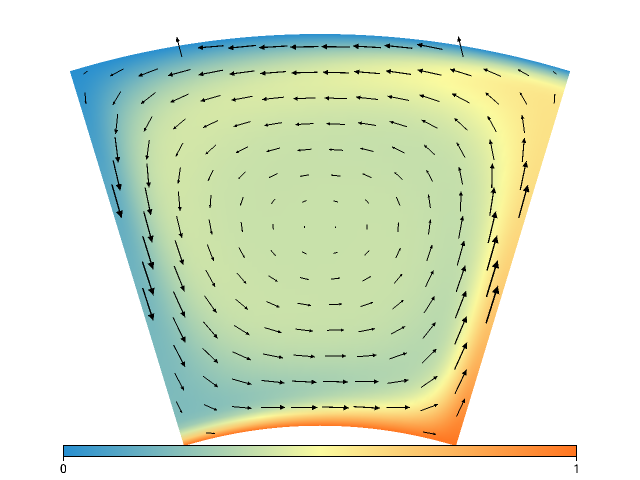

In [5]:
testmod.report()

In [6]:
testmod.data.analysers[0].dataDict

{'Nu': 13.37453264161533,
 'VRMS': 184.14520331805346,
 'avTemp': 0.3800285366613341,
 'avVisc': 1.0,
 'modeltime': 1.2783671274110884,
 'step': 100000,
 'surfVRMS': 189.43787192607752,
 'yielding': 1.0}

In [7]:
weightVar = planetengine.utilities.weightVar(testmod.system.mesh)


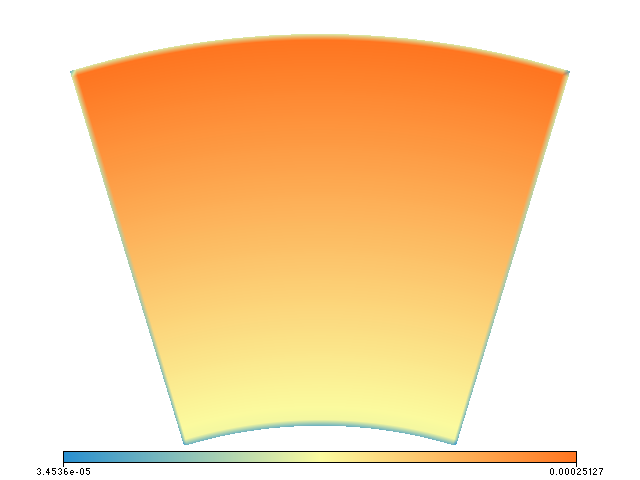

In [8]:
quickShow(weightVar)

In [72]:
velGrad.evaluate(mesh)[0]

array([  574.53375519,  1910.80268796,  1921.83708793,  -585.60797304])

In [9]:
mesh = testmod.system.mesh
velocityField = testmod.system.velocityField

In [10]:
velGrad = velocityField.fn_gradient

In [11]:
velGrad[0].evaluate(mesh)[2000]

array([ 76.9589155])

In [12]:
divFn = velGrad[0] + velGrad[3]

In [19]:
curlFn = velGrad[2] - velGrad[1]


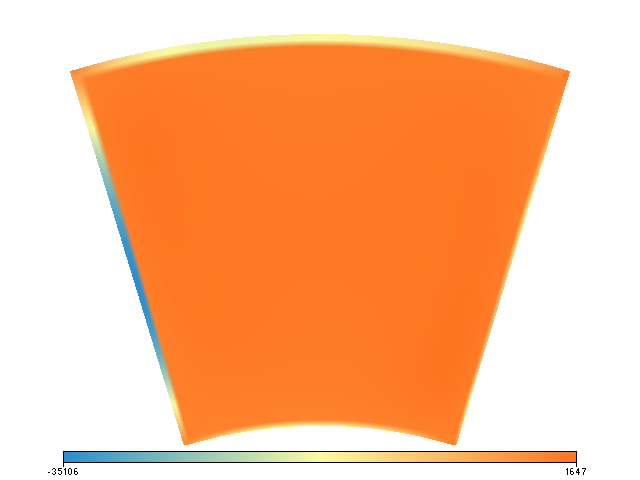

In [20]:
quickShow((mesh, curlFn))

In [13]:
divFn.evaluate(mesh)[2003]

array([-3.4132009])

In [18]:
allNodes = mesh.specialSets['Empty'].invert()
allNodes.invert()

AttributeError: 'NoneType' object has no attribute 'invert'

In [16]:
nonWalls = allNodes - mesh.specialSets['AllWalls_VertexSet']

TypeError: unsupported operand type(s) for -: 'NoneType' and 'FeMesh_IndexSet'

In [ ]:
stats.describe(divFn.evaluate(nonWalls))

In [ ]:
velGrad.evaluate(mesh)


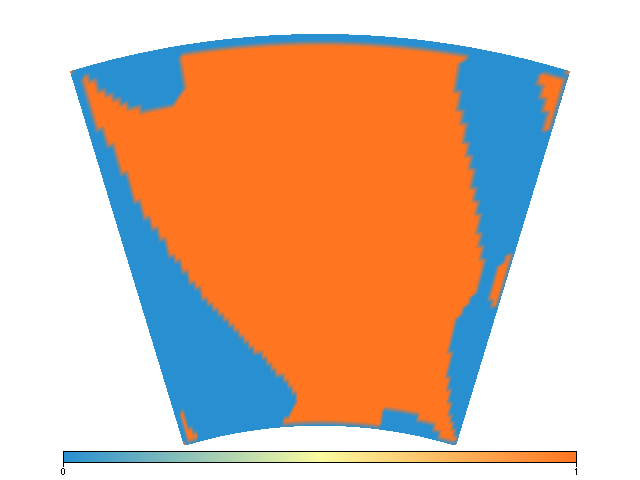

In [25]:
quickShow((mesh, (divFn > -20.) & (divFn < 20.)))

In [ ]:
tempArr = testmod.system.temperatureField.data
weightArr = weightVar.data
tempWeighted = tempArr * weightArr
tempWeighted2 = tempArr * weightArr / weightArr.mean()

In [12]:
mesh = testmod.system.mesh
outerArr = mesh.specialSets['outer'].data

In [13]:
np.sqrt(np.take(weightArr, outerArr)).sum() * 2.

1.807002141473016

In [ ]:
np.average(tempArr, axis = 0, weights = weightArr)

In [ ]:
stats.describe(tempWeighted2)

In [ ]:
weightArr.sum()

In [ ]:
stats.moment(TWArr, moment = 2)

In [ ]:
tempArr.mean()

In [ ]:
TWArr.sum()